# Gender representation at specialized astronomy conferences

#### *Nick Cox*

Following the recent study by Kyle Willett on gender representation at specialized astronomy conferences I have gathered similar data at another specialised astrophysics meeting, "Physics of Evolved Stars" (henceforth, POE2015). POE2015 was held in Nice, France from [8-12 June, 2015](http://poe2015.sciencesconf.org). The analysis strategy (ipyton notebook) has been cloned from Kyle Willet's github respository.

Briefly, recapitulating, the goal of these surveys is to track participation at conferences as a function of gender, particularly relating to question/answer sessions after oral presentations. This is intended to address some basic questions about behavior at conferences, such as:

* How equal are the allotments of talks among men and women?
* Are men and women asking questions at the same rate?
* Does it matter if the speaker/session chair is a man or a woman?
* Are women/men more likely to ask the ***first*** question in a session? Does this affect the gender balance of remaining questions?


These questions were first addressed with data-gathering efforts first led by James Davenport at the [223rd American Astronomical Society (AAS) meeting in 2014](http://www.ifweassume.com/2014/03/report-gender-in-aas-talks.html), and repeated at the [225th AAS meeting in 2015](http://nbviewer.ipython.org/github/jradavenport/aas225-gender/blob/master/analysis.ipynb) and the [National Astronomy Meeting (NAM) in the UK in 2014](http://arxiv.org/abs/1412.4571). These focus on question/answer sessions since these are public, quantifiable, and one of the main ways in which professional interaction takes place. These studies found that men ask disproportionally more questions than women, and that the gender of the session chair has a strong impact on the gender ratio of questioners. 

Following the gender representation at the above mentioned large, thematically broad meetings, Kyle Willett addressed the issue whether smaller, more specialized meetings follow the same trends. He tracked this data for a recent conference on "Unveiling the AGN-Galaxy Evolution Connection" (Puerto Varas, Chile from [9-13 March 2015](http://www.astro-udec.cl/agn15/)). There were a total of 200 people on the list of participants and the gender of speakers, chairs, and questioners for all 72 talks were tracked.

For POE215 there were 133 registered participants (97 male / 36 female) and a total of 42 oral presentation (excluding the intial two "review" talks (MM) and conference summary (F)). In addition to the gender of speakers, chairs and questioners, I also attempted to track the identity of the (most frequent) questioners. The discussion sessions are excluded for pratical reasons. Questioners were tracked for 39 talks.


## What are the overall demographics of the conference?

In [7]:
%pylab inline

'''
Note: this notebook requires the following, fairly standard Python packages:

    numpy
    scipy
    matplotlib
    pandas
    
And one not-as-common package (also available through PyPI):

    sexmachine
'''

from __future__ import division
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

gencolors =('purple','orange')
#urlbase = 'https://raw.githubusercontent.com/kalaschsoyuz/poe2015-gender/master'
#urlbase = 'http://localhost:8888/edit/Downloads/chile2015-gender-master/'
q = pd.read_csv('%s/question_data.csv' % urlbase)
c = pd.read_csv('%s/chair_data.csv' % urlbase)

fig = plt.figure(1,(6,6))

# Speakers
vc_speakers = q['speaker'].value_counts()

# People asking questions of the speakers
qa=list(q['questions'])
qa.remove(' ')
vc_questioners = pd.value_counts(list(''.join(qa)))

# Chairs of the sessions
vc_chairs = c['gender'].value_counts()

# Attendees

number_attendees = 133
number_f         = 36
number_m         = 97

#countrydata = pd.read_csv('%s/map/countries.csv' % urlbase)
#names = countrydata['name']
#firstnames = [x.split(' ')[0] for x in names]
# Guess (based on first names) what gender the attendees are
#from sexmachine import detector as gender
#d = gender.Detector(case_sensitive=False)
#from collections import Counter
#genders = [d.get_gender(fn) for fn in firstnames]
#cg = Counter(genders)
#attendees = list('M'*(cg['male'] + cg['mostly_male'])+'F'*(cg['female'] + cg['mostly_female']))
# Ignores users whose gender cannot be reliably determined from first name
#vc_genderdata = pd.read_csv('%s/.csv' % urlbase)
#vc_attendees = pd.value_counts(attendees)

# People who asked the first question of the speakers
first = [x[1]['questions'][0] for x in q.iterrows()]
first.remove(' ')
vc_firstquestion = pd.value_counts(first)

vc_personidentifier = pd.read_csv('%s/.csv' % urlbase)

# Load everything into a single dataframe

data = [vc_speakers,vc_chairs,vc_attendees,vc_questioners,vc_firstquestion][::-1]
labels = ['Speakers','Chairs','Attendees','Questioners','First question'][::-1]

normdata = [x/x.sum() for x in data]

# Plot stacked bar chart

ax1 = fig.add_subplot(111)
df = pd.DataFrame(normdata,index=labels)
dfplot = df.plot(kind='barh',stacked=True,ax=ax1,color=gencolors,legend=True)

print df

# Plot the 50-50 split for guidance

ylims1 = ax1.get_ylim()
ax1.vlines(0.5,ylims1[0],ylims1[1],color='k',linestyle='-')

ax1.set_xlabel('Fraction of participants',fontsize=20)
ax1.set_title('Overall demographics at the POE2015 meeting')

Populating the interactive namespace from numpy and matplotlib


HTTPError: HTTP Error 404: Not Found

### Analysis of overall demographics:

As in the previous survey (Willett 2015) I tracked gender participation for five aspects of the question/answer sessions. In addition I tracked the identify of the question askers:

***
* speakers
* chairs of the sessions
* all attendees of the conference
* people who asked questions of the speaker
* people who asked the **first** question of the speaker for any given talk
* people who asked the **most** questions 
***

The gender ratio of the speakers closely matched that of the attendees as a whole (XX% and XX%, respectively). 

## Overall demographics for <span style="color:red">POE2015</span> compared to other conferences

NameError: name 'normdata' is not defined

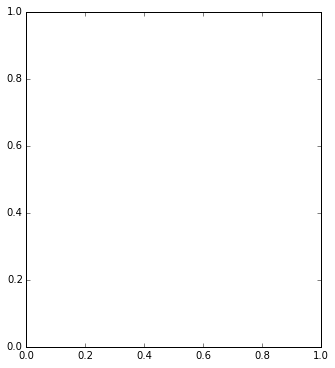

In [8]:
# Plot stacked bar chart
fig = plt.figure(1,(18,6))
ax1 = fig.add_subplot(131)

df = pd.DataFrame(normdata,index=labels)
dfplot = df.plot(kind='barh',stacked=True,ax=ax1,color=gencolors,legend=False)

print df

# Find data positions of the plots

patches = dfplot.patches
yc = [p.get_y() for p in patches]
yc = yc[:int(len(yc)/2)]
height = p.get_height()

ylims1 = ax1.get_ylim()
ax1.vlines(0.5,ylims1[0],ylims1[1],color='k',linestyle='-')

def getfrac(m,f):
    return m/(f+m)


# Speaker/questioner data from 225th AAS Meeting (Seattle, WA)
# Data from https://github.com/jradavenport/aas225-gender

aas225_speakers = getfrac(83,51)
aas225_questionaskers = getfrac(305,73)
aas225_firstquestion = getfrac(102,32)

ax1.vlines(aas225_speakers,yc[-1],yc[-1]+height,color='g',linestyle='--')
ax1.vlines(aas225_questionaskers,yc[-4],yc[-4]+height,color='g',linestyle='--')
ax1.vlines(aas225_firstquestion,yc[-5],yc[-5]+height,color='g',linestyle='--')

ax1.text(aas225_speakers,yc[-1]+height,'AAS',ha='center',va='bottom',fontsize=14,color='g')

ax1.set_xlabel('Fraction of participants',fontsize=20)

p,l = ax1.get_legend_handles_labels()
ax1.legend(p,l,loc='upper left')

ax1.set_title('AGN2015 vs. speakers at AAS 2015 Winter')

# Speaker/questioner data from National Astronomy Meeting 2014 (Portsmouth, UK)
# Data from Pritchard et al. (2014) http://arXiv.org/abs/1412.4571

ax2 = fig.add_subplot(132)
dfblank = pd.DataFrame(normdata,index=[' ']*5)
dfplot2 = dfblank.plot(kind='barh',stacked=True,ax=ax2,color=gencolors,legend=False)

nam_speakers = getfrac(181,81)
nam_chairs = getfrac(188,75)
nam_attendees = getfrac(452,172)
nam_questionaskers = getfrac(476,101)
nam_firstquestion = getfrac(216,35)

ylims2 = ax2.get_ylim()
ax2.vlines(0.5,ylims2[0],ylims2[1],color='k',linestyle='-')

ax2.vlines(nam_speakers,yc[-1],yc[-1]+height,color='g',linestyle='--')
ax2.vlines(nam_chairs,yc[-2],yc[-2]+height,color='g',linestyle='--')
ax2.vlines(nam_attendees,yc[-3],yc[-3]+height,color='g',linestyle='--')
ax2.vlines(nam_questionaskers,yc[-4],yc[-4]+height,color='g',linestyle='--')
ax2.vlines(nam_firstquestion,yc[-5],yc[-5]+height,color='g',linestyle='--')

ax2.text(nam_speakers,yc[-1]+height,'NAM',ha='center',va='bottom',fontsize=14,color='g')

ax2.set_xlabel('Fraction of participants',fontsize=20)

ax2.set_title('AGN2015 vs. NAM 2014')

# IAU individual members (as of Apr 2015)
# Data from http://www.iau.org/administration/membership/individual/distribution/

ax3 = fig.add_subplot(133)
dfplot3 = dfblank.plot(kind='barh',stacked=True,ax=ax3,color=gencolors,legend=False)
iau_frac = getfrac(9546,1803)
ylims3 = ax3.get_ylim()
ax3.vlines(0.5,ylims3[0],ylims3[1],color='k',linestyle='-')
ax3.vlines(iau_frac,ylims3[0],yc[-1]+height,color='g',linestyle='--')
ax3.text(iau_frac*1.02,yc[-1]+height,'IAU',ha='center',va='bottom',fontsize=14,color='g')

ax3.set_xlabel('Fraction of participants',fontsize=20)

ax3.set_title('AGN2015 vs. IAU individual members')

# Speaker/questioner data from AGN2015 Meeting (Chile)
# Data from xxxxx.

#agn2015_speakers = getfrac(x,x)
#agn2015_questionaskers = getfrac(x,x)
#agn2015_firstquestion = getfrac(x,x)
                        
agn2015_firstquestion  =0.614286 
agn2015_questionaskers = 0.641509 
agn2015_attendees = 0.564246
agn2015_chairs    = 0.785714
agn2015_speakers  = 0.549296

ax4.vlines(agn2015_speakers,yc[-1],yc[-1]+height,color='g',linestyle='--')
ax4.vlines(agn2015_questionaskers,yc[-4],yc[-4]+height,color='g',linestyle='--')
ax4.vlines(agn2015_firstquestion,yc[-5],yc[-5]+height,color='g',linestyle='--')

ax4.text(agn2015_speakers,yc[-1]+height,'AGN2015',ha='center',va='bottom',fontsize=14,color='g')
ax4.set_xlabel('Fraction of participants',fontsize=20)

p,l = ax4.get_legend_handles_labels()
ax4.legend(p,l,loc='upper left')

ax4.set_title('POE2015 vs. AGN2015')

### Analysis of the demographics compared to other meetings/organizations:

Smaller sample size. Frequent-questioners.

## How many questions per talk were there? Was this affected by the gender of the speaker?

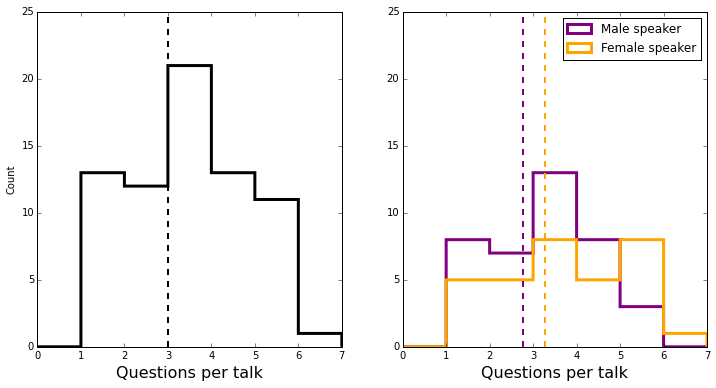

There are 3.0 +- 1.4 total questions per talk
There are 2.8 questions per talk when the speaker is male
There are 3.3 questions per talk when the speaker is female 
There is a 41.2 percent chance that the questions are drawn from the same distribution for male and female speakers.


In [3]:
# How many questions were there per talk? Did the gender of the speaker affect it?

fig2 = plt.figure(2,(12,6))
ax4 = fig2.add_subplot(121)
qpt = [len(x) for x in q['questions']]
ax4.hist(qpt,bins=range(0,8),histtype='step',range=(0,8),linewidth=3, color='k')
ylims4 = ax4.get_ylim()
ax4.vlines(np.mean(qpt),ylims4[0],ylims4[1],linestyle='--',color='black')
ax4.set_xlabel('Questions per talk',fontsize=16)
ax4.set_ylabel('Count')

ax5 = fig2.add_subplot(122)
mq = [len(x[1]['questions']) for x in q.iterrows() if x[1]['speaker'] == 'M']
fq = [len(x[1]['questions']) for x in q.iterrows() if x[1]['speaker'] == 'F']
ax5.hist(mq,bins=range(0,8),histtype='step',range=(0,8),linewidth=3, color='purple',label='Male speaker')
ax5.hist(fq,bins=range(0,8),histtype='step',range=(0,8),linewidth=3, color='orange',label='Female speaker')
ax5.set_ylim(ax4.get_ylim())
ylims5 = ax5.get_ylim()
ax5.vlines(np.mean(mq),ylims5[0],ylims5[1],linestyle='--',color='purple')
ax5.vlines(np.mean(fq),ylims5[0],ylims5[1],linestyle='--',color='orange')
ax5.set_xlabel('Questions per talk',fontsize=16)
ax5.legend(loc='upper right')

plt.show()

# Test to see if the distribution is different for male vs. female speakers

from scipy.stats import ks_2samp

D,p = ks_2samp(mq,fq)
print 'There are %.1f +- %.1f total questions per talk' % (np.mean(qpt),np.std(qpt))
print 'There are %.1f questions per talk when the speaker is male' % np.mean(mq)
print 'There are %.1f questions per talk when the speaker is female ' % np.mean(fq)
print 'There is a %.1f percent chance that the questions are drawn from the same distribution for male and female speakers.' % (p*100)



A difference in the number of questions per talk depending on the speaker might be interpreted as either a positive or negative effect (preferentially ignoring speakers of certain genders, overaggressively questioning/harassing them, paying attention and engaging with them, etc). More analysis on this data set would be pure speculation from me as to which was responsible at this conference. 


## Did the gender of people of asking questions depend on the speaker's gender?

                                 M         F
Male asks 1st question    0.694444  0.305556
Female asks 1st question  0.586538  0.413462

[2 rows x 2 columns]


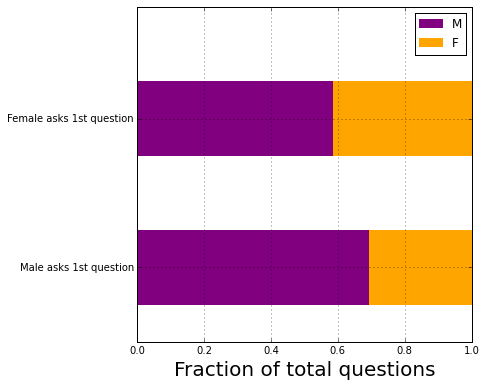

In [4]:
fig3 = plt.figure(3,(6,6))

malefirst_maleafter = ['M'*x[1]['questions'].count('M') for x in q.iterrows() if x[1]['speaker'] == 'M']
malefirst_femaleafter = ['F'*x[1]['questions'].count('F') for x in q.iterrows() if x[1]['speaker'] == 'M']
femalefirst_maleafter = ['M'*x[1]['questions'].count('M') for x in q.iterrows() if x[1]['speaker'] == 'F']
femalefirst_femaleafter = ["F"*x[1]['questions'].count('F') for x in q.iterrows() if x[1]['speaker'] == 'F']
vc_malefirst = pd.value_counts(list(''.join(malefirst_maleafter+malefirst_femaleafter)))
vc_femalefirst = pd.value_counts(list(''.join(femalefirst_maleafter+femalefirst_femaleafter)))

# Load everything into a single dataframe

firstdata = [vc_malefirst,vc_femalefirst]
firstlabels = ['Male asks 1st question','Female asks 1st question']

firstnormdata = [x/x.sum() for x in firstdata]
df = pd.DataFrame(firstnormdata,index=firstlabels)

print df

# Plot stacked bar chart

ax = fig3.add_subplot(111)
dfplot = df.plot(kind='barh',stacked=True,ax=ax,color=gencolors,legend=True)

ax.set_xlabel('Fraction of total questions',fontsize=20)

When women ask the **first** question in a session, women ask on average 40% of the total number of questions in such sessions. However, when men ask the first question in a session, women only ask 31% of the total questions in the session.

But this is clearly affected by the fact that the gender of the first question is fixed. To isolate that effect, let's look at the *remaining* questions in the session. 

                                 M         F
Male asks 1st question    0.666667  0.333333
Female asks 1st question  0.637931  0.362069

[2 rows x 2 columns]
z = 0.354


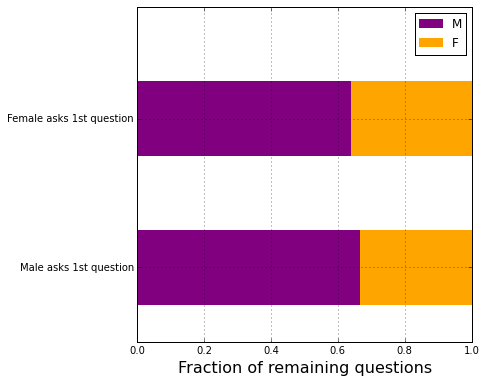

In [5]:
malefirst_maleafter = ['M'*x[1]['questions'][1:].count('M') for x in q.iterrows() if x[1]['questions'][0] == 'M']
malefirst_femaleafter = ['F'*x[1]['questions'][1:].count('F') for x in q.iterrows() if x[1]['questions'][0] == 'M']
vc_malefirst_remaining = pd.value_counts(list(''.join(malefirst_maleafter+malefirst_femaleafter)))

femalefirst_maleafter = ['M'*x[1]['questions'][1:].count('M') for x in q.iterrows() if x[1]['questions'][0] == 'F']
femalefirst_femaleafter = ["F"*x[1]['questions'][1:].count('F') for x in q.iterrows() if x[1]['questions'][0] == 'F']
vc_femalefirst_remaining = pd.value_counts(list(''.join(femalefirst_maleafter+femalefirst_femaleafter)))

# Load everything into a single dataframe

firstrdata = [vc_malefirst_remaining,vc_femalefirst_remaining]
firstrlabels = ['Male asks 1st question','Female asks 1st question']

firstrnormdata = [x/x.sum() for x in firstrdata]
#print firstrnormdata
dfr = pd.DataFrame(firstrnormdata,index=firstrlabels)

print dfr

# Plot stacked bar chart

fig = plt.figure(4,(6,6))
ax8 = fig.add_subplot(111)
dfplot = dfr.plot(kind='barh',stacked=True,ax=ax8,color=gencolors,legend=True)

ax8.set_xlabel('Fraction of remaining questions',fontsize=16)
ax8.set_xlim(0,1)

# Check statistical significance
# http://stats.stackexchange.com/questions/113602/test-if-two-binomial-distributions-are-statistically-different-from-each-other

def ztest(p1,p2,n1,n2):
    pexp = (n1*p1exp + n2*p2exp) / (n1+n2)
    z = (p1exp-p2exp) / np.sqrt(pexp*(1. - pexp)*(1/n1 + 1/n2))
    return z

p1exp,p2exp = dfr['M']
n1 = len(list(''.join(malefirst_maleafter+malefirst_femaleafter)))
n2 = len(list(''.join(femalefirst_maleafter+femalefirst_femaleafter)))
z = ztest(p1exp,p2exp,n1,n2)
print 'z = %.3f' % z

When the first question is eliminated from the data, the fraction of questions asked by females are nearly identical for females and males (33% and 36%, respectively). A two-proportion $z$-test indicates the distributions cannot reject the null hypothesis at $<1\sigma$ level. 

This result differs from the AAS meeting data, who found an extremely strong difference between the two. If the first question was asked by a male, then only 10% of the remaining questions were asked by a female. If the first question was asked by a female, 49% of the remaining questions were asked by a female. 

## Does the gender of the session chair affect the distribution of the questioners' gender?

                     M         F
Male chair    0.640000  0.360000
Female chair  0.648649  0.351351

[2 rows x 2 columns]


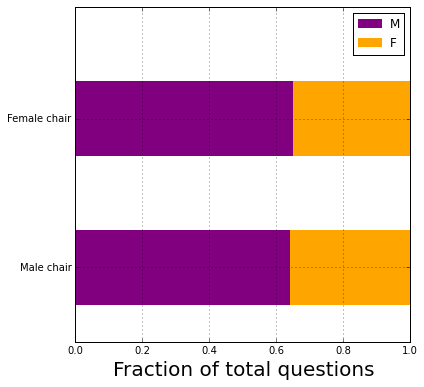

In [6]:
cdict = {}
for k,v in zip(c['block'].values,c['gender'].values):
    cdict[k]=v

malechair_maleafter = ['M'*x[1]['questions'].count('M') for x in q.iterrows() if cdict[int(str(x[1]['session']).split('.')[0])] == 'M']
malechair_femaleafter = ['F'*x[1]['questions'].count('F') for x in q.iterrows() if cdict[int(str(x[1]['session']).split('.')[0])] == 'M']
femalechair_maleafter = ['M'*x[1]['questions'].count('M') for x in q.iterrows() if cdict[int(str(x[1]['session']).split('.')[0])] == 'F']
femalechair_femaleafter = ["F"*x[1]['questions'].count('F') for x in q.iterrows() if cdict[int(str(x[1]['session']).split('.')[0])] == 'F']
vc_malechair = pd.value_counts(list(''.join(malechair_maleafter+malechair_femaleafter)))
vc_femalechair = pd.value_counts(list(''.join(femalechair_maleafter+femalechair_femaleafter)))

# Load everything into a single dataframe

chairdata = [vc_malechair,vc_femalechair]
chairlabels = ['Male chair','Female chair']

chairnormdata = [x/x.sum() for x in chairdata]
df = pd.DataFrame(chairnormdata,index=chairlabels)

print df

# Plot stacked bar chart
fig5 = plt.figure(3,(6,6))
ax = fig5.add_subplot(111)
dfplot = df.plot(kind='barh',stacked=True,ax=ax,color=gencolors,legend=True)

ax.set_xlabel('Fraction of total questions',fontsize=20)

# Check statistical significance

p1exp,p2exp = df['M']
n1 = len(list(''.join(malechair_maleafter+malechair_femaleafter)))
n2 = len(list(''.join(femalechair_maleafter+femalechair_femaleafter)))
z = ztest(p1exp,p2exp,n1,n2)

When looking at the gender of the session chair (who might have selection biases when there are more questions than time permits), there is no difference in the gender distribution of questioners. In this case the data are nearly identical for male vs. female chairs, at 36% and 35% females respectively. 

This null result differs from the NAM data, who saw a small but significant decrease in the fraction of females asking questions when the chair was male (16%) as opposed to a female chair (22%). 

## Is there a bias due to frequent questioners?

In [ ]:
## sort on number of questions per unique personal identifier
## what happens is we exclude the X outliers?

## (Some) conclusions

Priors.

Integrate this with the AGN2015, to get sample size $N>>1$.
First step, clone the chile2015 github / ipython notebook.

The following can be taken from comparing the results for POE2015 with previous specialized (AGN2015) and general (AAS, NAM) meetings:

* both the attendees and questioners had significantly higher female/male ratios than the NAM or AAS meetings
* the male/female ratio was similar for both attendees and speakers, meaning that there was no apparent preference towards which gender got the opportunity to give a talk
* both male and female speakers received about the same number of questions per talk
* the gender of the first person to ask a question didn't affect subsequent questions
* the gender of the session chair didn't affect subsequent questions

*Thanks to POE215 for organising the meeting. Thanks to Kyle Willett, James Davenport, Jonathan Pritchard, and Karen Masters for their previous hard work at the AGN2015, AAS, and NAM meetings.*